In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/assets/clean_jobs.csv')
df.head()

,id,title,company,location,link,source,date_posted,work_type,employment_type,description
0,1,Data Analyst,Meta,"New York, NY",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
1,2,Data Analyst,Meta,"San Francisco, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
2,3,Data Analyst,Meta,"Los Angeles, CA",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
3,4,Data Analyst,Meta,"Washington, DC",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-14,NaN,NaN,The Social Measurement team is a growing team ...
4,5,Data Analyst II,Pinterest,"Chicago, IL",https://www.linkedin.com/jobs/view/data-analys...,LinkedIn,2025-04-16,NaN,NaN,About Pinterest\n\nMillions of people around t...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               327 non-null    int64  
 1   title            327 non-null    object 
 2   company          327 non-null    object 
 3   location         327 non-null    object 
 4   link             327 non-null    object 
 5   source           327 non-null    object 
 6   date_posted      327 non-null    object 
 7   work_type        0 non-null      float64
 8   employment_type  0 non-null      float64
 9   description      327 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 25.7+ KB


In [ ]:
df.isnull().sum()

,0
id,0
title,0
company,0
location,0
link,0
source,0
date_posted,0
work_type,327
employment_type,327
description,0


In [ ]:
df[['work_type','employment_type']]

,work_type,employment_type
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
322,NaN,NaN
323,NaN,NaN
324,NaN,NaN
325,NaN,NaN


No charts were generated by quickchart


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#df.drop(columns=['work_type','employment_type'],inplace=True)
df.columns

Index(['id', 'title', 'company', 'location', 'link', 'source', 'date_posted',
       'description'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

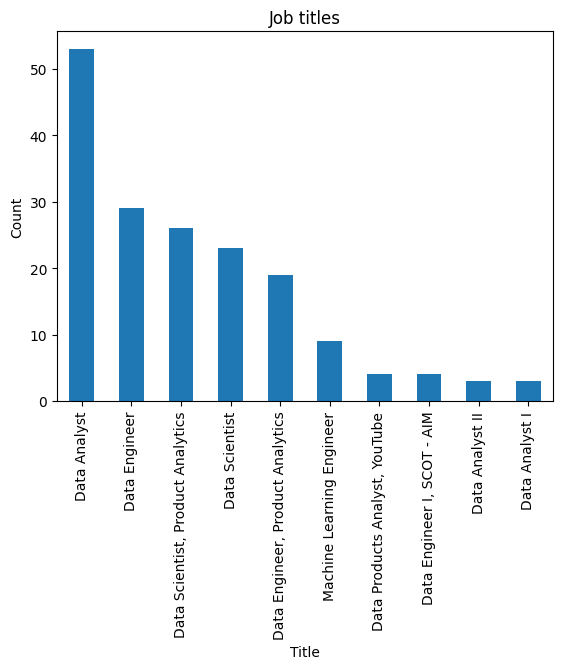

In [ ]:
df['title'].value_counts().head(10).plot(kind='bar')
plt.title('Job titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

In [ ]:
df['title'].value_counts()

,count
title,
Data Analyst,53
Data Engineer,29
"Data Scientist, Product Analytics",26
Data Scientist,23
"Data Engineer, Product Analytics",19
...,...
Data Analytics Engineer,1
Data Engineer (Platform),1
Data Engineer- Python Pyspark,1


Replacing job titles to generalised titles like Data Engineer/Analyst.

In [ ]:
df['Standard_title'] = ''

title_map = {'analyst' : 'Data Analyst',
              'Data Engineer' : 'Data Engineer',
              'Data Scientist' : 'Data Scientist',
              'Machine learning' : 'ML Engineer',
             'Data analytics' : 'Data Analyst',
             'AI' : 'AI/ML Engineer',
             'ML' : 'ML Engineer'}

for i,val in df['title'].items():
  for key,label in title_map.items():
    if key.lower() in val.lower():
      df.loc[i,'Standard_title'] = label
      break
    else:
      df.loc[i,'Standard_title'] = 'Other'

In [ ]:
df['Standard_title'].value_counts()


,count
Standard_title,
Data Analyst,109
Data Engineer,95
Data Scientist,82
Other,19
ML Engineer,16
AI/ML Engineer,6


Checking for other job titles which don't fall under the standard title category. title_map is then updated

In [ ]:
y = []
y = df['Standard_title'].apply(lambda x: x not in ['Data Analyst', 'Data Engineer', 'Data Scientist', 'ML Engineer'])
print(df.loc[y,'title'])

20                                  Analytics Associate
58              Analista de Dados Junior - São Paulo/SP
71                        Officer - Real Time Analytics
74                    ANALISTA GESTAO DE INDICADORES PL
81                  Analista de Dados Júnior | Data Viz
89                             Analista de Dados Júnior
98             Analista de Business Intelligence Júnior
99                             Data Associate - Gurgaon
104                 Analista de Análise de Dados Junior
108                                         Data Intern
135                                      AI/ML Engineer
138    Cientista de Dados II - Área Prevenção a Fraudes
146                                           GEN AI/ML
157                           Junior Frontend Developer
163                        Cientista de Dados - Estágio
172                  Research And Development Scientist
187                                     AI/ML Developer
189                                    AI/ML Res

Updated plot with generalised job titles

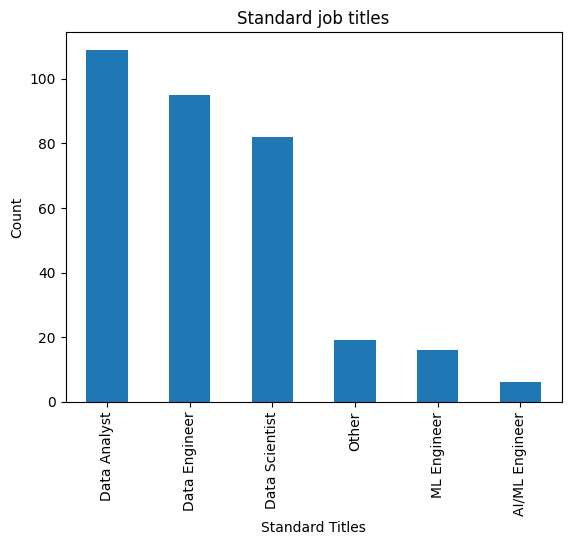

In [ ]:
df['Standard_title'].value_counts().plot(kind='bar')
plt.title('Standard job titles')
plt.xlabel('Standard Titles')
plt.ylabel('Count')
plt.show()

In [ ]:
df['description']

,description
0,The Social Measurement team is a growing team ...
1,The Social Measurement team is a growing team ...
2,The Social Measurement team is a growing team ...
3,The Social Measurement team is a growing team ...
4,About Pinterest\n\nMillions of people around t...
...,...
322,Senior Data Engineer\n\nPosition Summary\n\nTh...
323,Job Title:- Data Engineer with Pyspark\n\nLoca...
324,"About Us\n\n\n\n\nAt Mercedes-Benz, we don’t j..."
325,Data Engineer I – Infrastructure & Automation ...


Creating a list with possible technologies/tools required for working in any data related job. Converting this list to lower case for comparision.

In [ ]:
data_job_techstack = ['Python', 'R', 'SQL', 'PostgreSQL', 'NOSQL', 'Scala', 'Java', "Excel", "Power BI", "Tableau", "Looker", "Google Data Studio", "Apache Superset", "pandas", "numpy", "matplotlib", "seaborn", "plotly",
        "scikit-learn", "TensorFlow", "Keras", "PyTorch", "XGBoost", "LightGBM", "spaCy", "NLTK", "transformers", "openpyxl", "xlrd", "fuzzywuzzy", "MySQL", "PostgreSQL", "SQLite", "Microsoft SQL Server", "Oracle",
        "MongoDB", "BigQuery", "Redshift", "Snowflake", "Apache Airflow", "dbt", "Talend", "Informatica", "Alteryx", "AWS Glue", "Apache NiFi", "Microsoft SSIS", "DataStage",  "AWS", "Azure", "GCP",
        "S3", "Glue", "Redshift", "Athena", "EMR", "SageMaker", "Data Factory", "Synapse", "Blob Storage", "ML Studio", "BigQuery", "Dataflow", "Vertex AI", "Jupyter", "MLflow", "DVC", "Hugging Face", "AutoML",
        "DataRobot", "H2O.ai", "Apache Spark", "Hadoop", "Hive", "Kafka", "Flink", "Dask" , "BigQuery", "Git", "GitHub" "Docker", "Kubernetes", "Jenkins", "GitHub Actions" ]

In [ ]:
data_job_techstack_lower = []
for skill in data_job_techstack:
  data_job_techstack_lower.append(skill.lower())

In [ ]:
def extract_skill(text):
  extracted_skill = []
  list_of_text = text.split()
  for word in list_of_text:
    if word.lower() in data_job_techstack_lower:
      extracted_skill.append(word)
  return extracted_skill

In [ ]:
desc = 'expected to know python skilled in sql'
extract_skill(desc)

['python', 'sql']

In [ ]:
df['Skills'] = df['description'].apply(lambda x: extract_skill(x))
df['Skills']

,Skills
0,"[SQL, Python, Tableau, SQL]"
1,"[SQL, Python, Tableau, SQL]"
2,"[SQL, Python, Tableau, SQL]"
3,"[SQL, Python, Tableau, SQL]"
4,"[SQL, Python]"
...,...
322,"[Python, SQL, Informatica, AWS, S3, Redshift, ..."
323,"[AWS, AWS, AWS, SQL]"
324,"[NoSQL, Python, R]"
325,"[SQL, Python]"


In [ ]:
df.columns

Index(['id', 'title', 'company', 'location', 'link', 'source', 'date_posted',
       'description', 'Standard_title', 'Skills'],
      dtype='object')

In [ ]:
all_words = pd.Series(''.join(df['description']).split())

In [ ]:
print(all_words)
from wordcloud import WordCloud

0                 The
1              Social
2         Measurement
3                team
4                  is
             ...     
207350           form
207351             of
207352          RSUs.
207353           Show
207354           more
Length: 207355, dtype: object


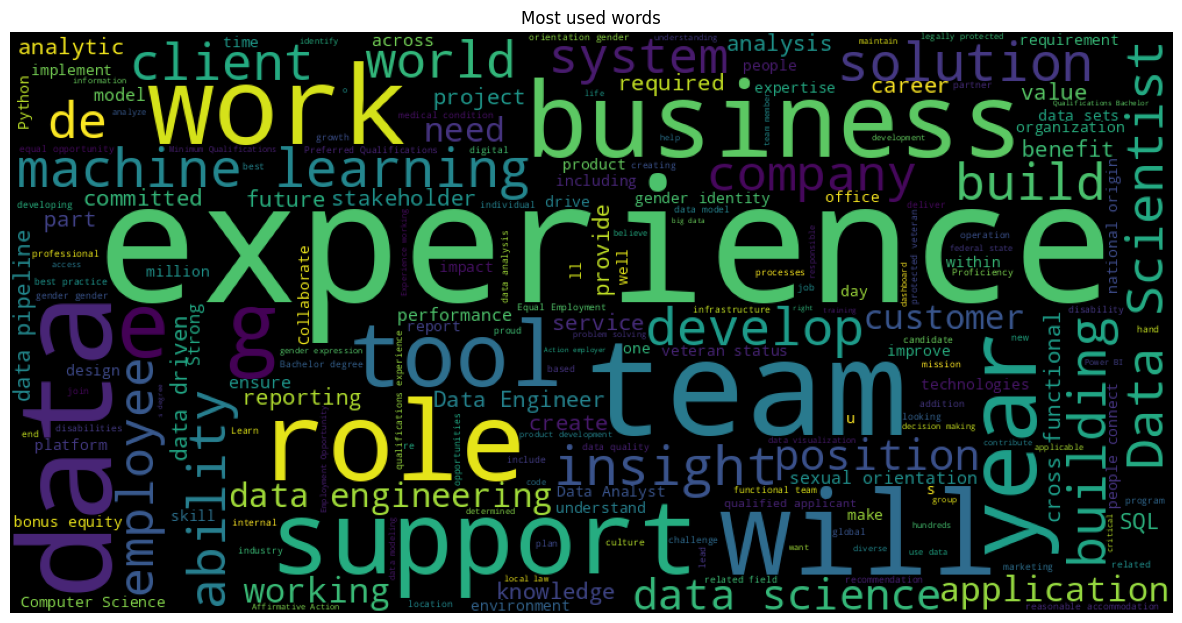

In [ ]:
wordcloud = WordCloud(width=1000, height=500).generate(' '.join(all_words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title('Most used words')
plt.axis('off')
plt.show()

,Standard_title
0,Data Analyst
1,Data Analyst
2,Data Analyst
3,Data Analyst
4,Data Analyst
...,...
322,Data Engineer
323,Data Engineer
324,Data Engineer
325,Data Engineer
